In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from dataset import Data, ResizeTransform
from conditional_gan import CGenerator5Net, CDiscriminator5, train
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import pandas as pd
from visualize import plot_batch
from visualize import cGanPlotLossCallback

%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATA_PATH = 'data/img_align_celeba'
BATCH_SIZE = 512
NUM_WORKERS = 1
Z_SIZE = 100
MODEL_PATH = 'conditional_model/'
LOAD_MODEL = False
LOAD_EPOCH_N = 2

In [3]:

transform = ResizeTransform(path='data')
data = Data(DATA_PATH, Z_SIZE, transform, return_attr=True)
data_loader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, drop_last=True)
print('Dataset size: ', len(data))
Y_SIZE = data.y_size


Dataset size:  202599


In [4]:
generator = CGenerator5Net(Z_SIZE, Y_SIZE).cuda()
discriminator = CDiscriminator5(Y_SIZE).cuda()

In [5]:
if LOAD_MODEL:
    generator.load_state_dict(torch.load(MODEL_PATH + 'generator_%d.pth' % (LOAD_EPOCH_N,)))
    discriminator.load_state_dict(torch.load(MODEL_PATH + 'discriminator_%d.pth' % (LOAD_EPOCH_N,)))

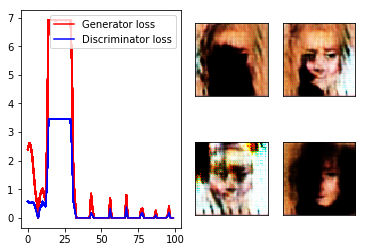

In [6]:
callback = cGanPlotLossCallback(generator, discriminator)
train(generator, discriminator, data_loader, 100, k=1, callback_func=callback)


In [ ]:
Z = torch.normal(mean=torch.zeros(4, generator.z_size)).cuda()
G_sample = generator(Z)
sample = G_sample.data.cpu().numpy()
print(discriminator.layer4.weight.cpu().detach().numpy())
plot_batch((G_sample.data.cpu().numpy() + 1) / 2)